In [63]:
import pandas as pd 
from pandas import DataFrame as df
import numpy as np
import re
import datetime as dt
import matplotlib.pyplot as plt


## Reading the dataset

In [64]:
df_21jobs=pd.read_csv("wuzzaf_3_8_2021.csv")
df_21jobs.head(10)

,job_title,company,job_description,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,2021,NaN,NaN,NaN,NaN,NaN,NaN
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,2021,NaN,NaN,NaN,NaN,NaN,NaN
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,2021,NaN,NaN,NaN,NaN,NaN,NaN
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,2021,NaN,NaN,NaN,NaN,NaN,NaN
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,2021,NaN,NaN,NaN,NaN,NaN,NaN
5,Software Engineer (Multinational) IT Large,Pillars,Full Time · Entry Level · 1-3 Yrs of Exp · In...,2021,NaN,NaN,NaN,NaN,NaN,NaN
6,Software Engineer (Multinational) IT Large...,Pillars,Full Time · Entry Level · 1-3 Yrs of Exp · In...,2021,NaN,NaN,NaN,NaN,NaN,NaN
7,Software Engineer (Multinational) IT Large...,Pillars,Full Time · Entry Level · 1-3 Yrs of Exp · In...,2021,NaN,NaN,NaN,NaN,NaN,NaN
8,Senior Software Developer - Java,CrossWorkers,Full Time · Experienced · 4+ Yrs of Exp · Inf...,2021,NaN,NaN,NaN,NaN,NaN,NaN
9,Software Developer - As/400 Developer,Target Recruitment & HR Solutions,Full Time · Experienced · 5-10 Yrs of Exp · S...,2021,NaN,NaN,NaN,NaN,NaN,NaN


## making a copy of the dataframe so we dont manipulate the original one

In [65]:
df_21jobsc=df_21jobs.copy()
df_21jobsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         2547 non-null   object 
 1   company           2547 non-null   object 
 2    job_description  2542 non-null   object 
 3   Unnamed: 3        2396 non-null   object 
 4   Unnamed: 4        32 non-null     object 
 5   Unnamed: 5        3 non-null      object 
 6   Unnamed: 6        2 non-null      object 
 7   Unnamed: 7        1 non-null      object 
 8   Unnamed: 8        1 non-null      object 
 9   Unnamed: 9        1 non-null      float64
dtypes: float64(1), object(9)
memory usage: 199.1+ KB


## Assessing result

1-drop unwanted columns

2-rename the columns to clear names

3-divide the job description colmuns into 2 columns

-Job level

-Job Type

In [66]:
df_21jobsc.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [67]:
df_21jobsc=df_21jobsc.rename(columns = {'job_title  ':'JobTitle',' job_description':'description'})
df_21jobsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     2547 non-null   object
 1   company      2547 non-null   object
 2   description  2542 non-null   object
dtypes: object(3)
memory usage: 59.8+ KB


## Clearing any NaN values from the columns

In [68]:
df_21jobsc['description'].replace(' ',np.nan,inplace= True)
df_21jobsc["description"].fillna("Unknown",inplace=True)
df_21jobsc['company'].replace(' ',np.nan,inplace= True)
df_21jobsc["company"].fillna("Hidden Name",inplace=True)

df_21jobsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitle     2547 non-null   object
 1   company      2547 non-null   object
 2   description  2547 non-null   object
dtypes: object(3)
memory usage: 59.8+ KB


## creating Job levels column extracted from the description and adding it to the original dataframe

In [69]:
desc_col=df_21jobsc.description
level_list=[]
for temp_var in desc_col:
    if('Entry Level' in temp_var):
        level_list.append('Entery Level')
    elif('Experienced' in temp_var):
        level_list.append('Experienced')
    elif('Manager' in temp_var or 'Senior Management' in temp_var):
        level_list.append('Managerial')
    elif('Internship'in temp_var):
        level_list.append('Internship')
    else:
        level_list.append(temp_var)
        
level_list[:10]

['Experienced',
 'Experienced',
 'Experienced',
 'Entery Level',
 'Experienced',
 'Entery Level',
 'Entery Level',
 'Entery Level',
 'Experienced',
 'Experienced']

In [70]:
df_21jobsc['Level']=level_list
df_21jobsc.head()

,JobTitle,company,description,Level
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entery Level
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced


## creating the type list for the job type column and add it to the dataframe

In [71]:
type_list=[]
for temp_var in desc_col:
    if('Full Time' in temp_var):
        type_list.append('Full Time')
    elif('Part Time' in temp_var):
        type_list.append('Part Time')
    elif('Full Time'and'Part Time'in temp_var):
        type_list.append('Full time and part time')
    elif('Internship' in temp_var):
        type_list.append('Internship')
    elif('Full Time 'and' Part Time 'and' Work From Home' in temp_var):
        type_list.append('Full Time And Part Time And Work From Home')
    else:
        type_list.append('Full Time')
type_list[:10]

['Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time']

In [72]:
df_21jobsc['Type']=type_list
df_21jobsc.head()

,JobTitle,company,description,Level,Type
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced,Full Time
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced,Full Time
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced,Full Time
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entery Level,Full Time
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced,Full Time


In [73]:
df_21jobsc.Level.value_counts().head()

Experienced     1623
Entery Level     515
Managerial       364
Internship        16
 LLC               8
Name: Level, dtype: int64

In [74]:
df_21jobsc.Type.value_counts().head()

Full Time                                     2465
Part Time                                       37
Internship                                      33
Full Time And Part Time And Work From Home      12
Name: Type, dtype: int64

In [75]:
df_21jobsc.JobTitle.value_counts().head()

IT Specialist          20
Business Analyst       16
Graphic Designer       14
Front End Developer    14
Project Manager        13
Name: JobTitle, dtype: int64

## creating job categories list from the jobtitle column and then add this column to the dataframe

In [76]:
x=df_21jobsc.JobTitle
Group_list=[]
for temp_jobtitle in x:
    if("IT" in temp_jobtitle):
        Group_list.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in temp_jobtitle):
        Group_list.append('Software Engneering ')
    else:
        Group_list.append(x)  
Group_list[:5]

['Software Engneering ',
 'Software Engneering ',
 'Software Engneering ',
 'Software Engneering ',
 'Software Engneering ']

In [77]:
df_21jobsc['StandardJobTitle']=Group_list
df_21jobsc.head()

,JobTitle,company,description,Level,Type,StandardJobTitle
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entery Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced,Full Time,Software Engneering


## Dividing the dataframe into 3 datasets :
1- entry level

2- experienced level

3- managerial level

In [78]:
df_entry=df_21jobsc[df_21jobsc["Level"]=='Entery Level']
df_entry.head()

,JobTitle,company,description,Level,Type,StandardJobTitle
3,Software Developer / Desktop Development,ITS,Full Time · Entry Level · 0-2 Yrs of Exp · Co...,Entery Level,Full Time,Software Engneering
5,Software Engineer (Multinational) IT Large,Pillars,Full Time · Entry Level · 1-3 Yrs of Exp · In...,Entery Level,Full Time,IT Category
6,Software Engineer (Multinational) IT Large...,Pillars,Full Time · Entry Level · 1-3 Yrs of Exp · In...,Entery Level,Full Time,IT Category
7,Software Engineer (Multinational) IT Large...,Pillars,Full Time · Entry Level · 1-3 Yrs of Exp · In...,Entery Level,Full Time,IT Category
11,Vodafone Egypt Customer Care Advisor,Vodafone Egypt,Full Time · Entry Level · 0-3 Yrs of Exp · Ad...,Entery Level,Full Time,Software Engneering


In [79]:
df_exp=df_21jobsc[df_21jobsc["Level"]=='Experienced']
df_exp.head()

,JobTitle,company,description,Level,Type,StandardJobTitle
0,Business Development Specialist - Upper Egypt,golden,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,Full Time · Experienced · 4+ Yrs of Exp · Sof...,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,Full Time · Experienced · 6-10 Yrs of Exp · S...,Experienced,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,Full Time · Experienced · 4-12 Yrs of Exp · A...,Experienced,Full Time,Software Engneering
8,Senior Software Developer - Java,CrossWorkers,Full Time · Experienced · 4+ Yrs of Exp · Inf...,Experienced,Full Time,Software Engneering


In [80]:
df_mang=df_21jobsc[df_21jobsc["Level"]=='Managerial']
df_mang.head()

,JobTitle,company,description,Level,Type,StandardJobTitle
34,Software Development (Back End .Net) Team Lead,PaySky,Full Time · Manager · 5-10 Yrs of Exp · Infor...,Managerial,Full Time,Software Engneering
47,Upper Egypt Area Manager (Operations),Bosta,Full Time · Manager · 5-8 Yrs of Exp · Operat...,Managerial,Full Time,Software Engneering
62,IT Manager (Head Of IT) - (World Class...,Pillars,Full Time · Manager · 10-20 Yrs of Exp · Info...,Managerial,Full Time,IT Category
67,Software Business Development Manager,A1Softech,Full Time · Manager · 9-12 Yrs of Exp · Sales...,Managerial,Full Time,Software Engneering
78,Java Spring Developer Team Leader,Digital Force,Full Time · Manager · 6-9 Yrs of Exp · Git · ...,Managerial,Full Time,Software Engneering


## saving the datasets as csv files

In [81]:
df_21jobsc.to_csv("wuzzafCleaned2021.csv", index = False)
df_entry.to_csv("WuzzafEntryleveljobs2021.csv", index = False)
df_exp.to_csv("wuzzafexperiencedjobs2021.csv", index = False)
df_mang.to_csv("wuzzafmangerjobs2021.csv", index = False)

In [82]:
df_21cleaned=pd.read_csv("wuzzafCleaned2021.csv")

In [83]:
df_21cleaned.JobTitle.value_counts().head(10)

IT Specialist                 20
Business Analyst              16
Graphic Designer              14
Front End Developer           14
Project Manager               13
IT Help Desk Specialist       13
Senior Software Developer     12
Senior Java Developer         12
Senior Front End Developer    11
Full Stack Developer          11
Name: JobTitle, dtype: int64

In [84]:
df_21cleaned.company.value_counts().head(10)

 Confidential                                   278
 FlairsTech                                      44
 Fawry Banking & Payment Technology Services     23
 Cegedim                                         18
 Pillars                                         17
 Ibtikar                                         15
 Perfect Presentation                            15
 e-finance                                       15
 Sumerge                                         15
 Centro Global Solutions                         14
Name: company, dtype: int64

In [85]:
df_21cleaned.StandardJobTitle.describe()

count                     2547
unique                       2
top       Software Engneering 
freq                      2382
Name: StandardJobTitle, dtype: object

In [86]:
df_21cleaned.JobTitle.describe()

count              2547
unique             1842
top       IT Specialist
freq                 20
Name: JobTitle, dtype: object

<AxesSubplot:title={'center':' Most Job category in 2021 '}>

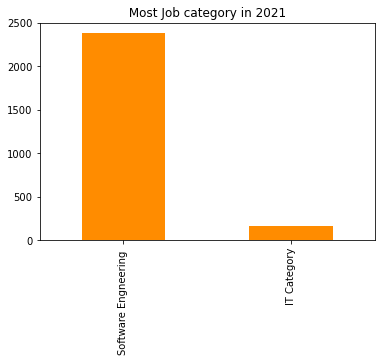

In [87]:
std_title=df_21cleaned.StandardJobTitle.value_counts().head(2)
std_title.plot(kind = 'bar',color = "darkorange",title=' Most Job category in 2021 ')

<AxesSubplot:title={'center':'Most offers during the last quarter of 2021 '}>

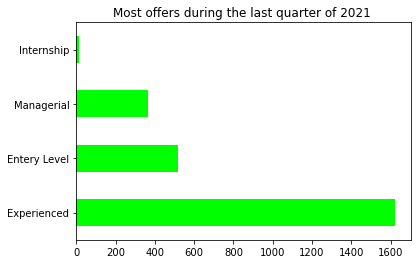

In [110]:
level = df_21cleaned.Level.value_counts()[:4]
level.plot(kind='barh',color='lime', title='Most offers during the last quarter of 2021 ') 

<AxesSubplot:title={'center':'Most employing companies'}>

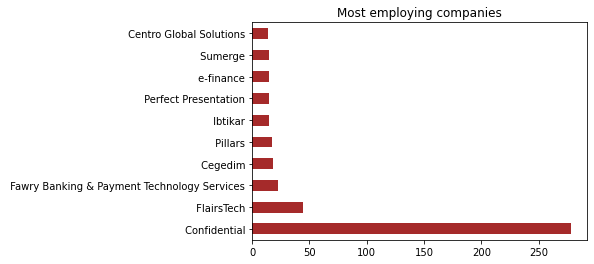

In [98]:
company = df_21cleaned['company'].value_counts()[:10]
company.plot(kind = 'barh',color = "brown",title='Most employing companies')

In [112]:
df_entry.StandardJobTitle.describe()

count                      515
unique                       2
top       Software Engneering 
freq                       459
Name: StandardJobTitle, dtype: object

<AxesSubplot:title={'center':'Most wanted job titles in entery level'}, ylabel='Frequency'>

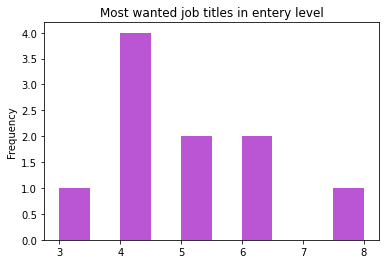

In [117]:
_titlee = df_entry['JobTitle'].value_counts()[:10]
_titlee.plot(kind = 'hist',color = "mediumorchid",title='Most wanted job titles in entery level')

<AxesSubplot:title={'center':'Most wanted categories in entery level'}, ylabel='StandardJobTitle'>

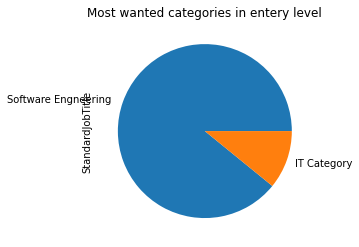

In [120]:
std_titlee = df_entry['StandardJobTitle'].value_counts()[:10]
std_titlee.plot(kind = 'pie',title='Most wanted categories in entery level')

<AxesSubplot:title={'center':'Top 10 companies'}, ylabel='company'>

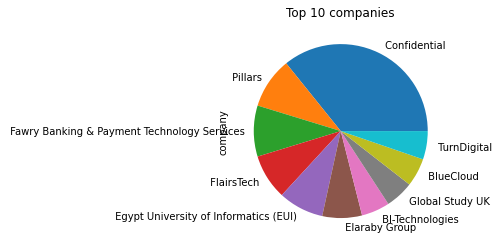

In [124]:
cmp = df_entry['company'].value_counts()[:10]
cmp.plot(kind = 'pie',title='Top 10 companies')

In [123]:
df_exp.describe()

,JobTitle,company,description,Level,Type,StandardJobTitle
count,1623,1623,1623,1623,1623,1623
unique,1176,682,1609,1,3,2
top,Business Analyst,Confidential,Full Time · Experienced · 2+ Yrs of Exp · Bus...,Experienced,Full Time,Software Engneering
freq,13,170,4,1623,1588,1541


<AxesSubplot:title={'center':'Top 10 jobs'}, ylabel='JobTitle'>

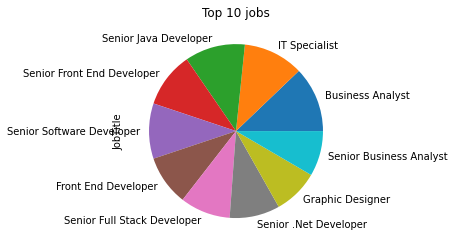

In [125]:
title = df_exp['JobTitle'].value_counts()[:10]
title.plot(kind = 'pie',title='Top 10 jobs')

<AxesSubplot:title={'center':'Most wanted categories in entery level'}>

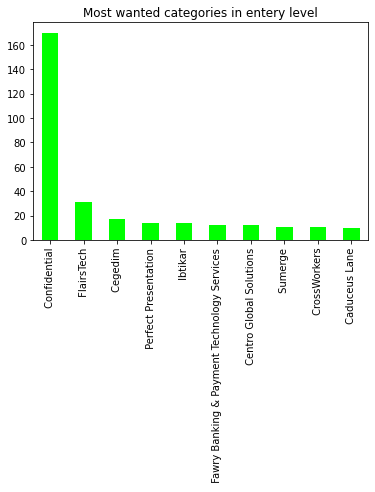

In [127]:
cmp = df_exp['company'].value_counts()[:10]
cmp.plot(kind = 'bar',color='lime',title='Most wanted categories in entery level')

In [128]:
df_mang.describe()

,JobTitle,company,description,Level,Type,StandardJobTitle
count,364,364,364,364,364,364
unique,299,208,361,1,2,2
top,IT Manager,Confidential,Full Time · Manager · 5+ Yrs of Exp · Agricul...,Managerial,Full Time,Software Engneering
freq,9,74,2,364,363,338


<AxesSubplot:title={'center':'Top 10 jobs'}, ylabel='JobTitle'>

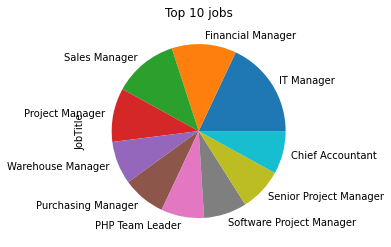

In [129]:
title = df_mang['JobTitle'].value_counts()[:10]
title.plot(kind = 'pie',title='Top 10 jobs')

<AxesSubplot:title={'center':'Most wanted categories in entery level'}>

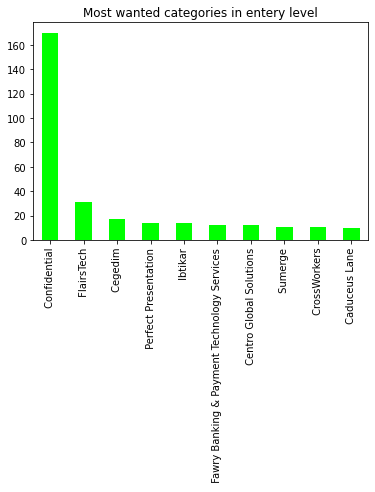

In [130]:
cmp = df_exp['company'].value_counts()[:10]
cmp.plot(kind = 'bar',color='lime',title='Most wanted categories in entery level')